<a href="https://colab.research.google.com/github/gnitnaw/Programs/blob/master/Chapter6/Ridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python --version

Python 3.7.12


# Import modules

In [2]:
import numpy as np
from numpy.random import rand , randn
from numpy.linalg import norm , solve, inv
from scipy.linalg import hilbert # Add Hibert matrix
import matplotlib.pyplot as plt
import scipy
import math 
from scipy.special import gamma
print(scipy.__version__)
print(np.__version__)

1.4.1
1.19.5


## Set random seed

In [3]:
np.random.seed(12)

# Generate events

In [4]:
def generate_y(n):
   x = np.random.rand(n, 1)*10
   y = -1.5+0.5*x + np.random.randn(n, 1)
   return x, y

In [5]:
N = 1000
x, y = generate_y(N)
print(np.mean(y))

1.030363600470214


## Loss function

In [6]:
def loss_function(b0, b1):
  sum_var = 0.0
  for i in range(N):
    var_y = (y[i]-(b0+b1*x[i]))**2
    sum_var += var_y
  return sum_var/N



## Contour

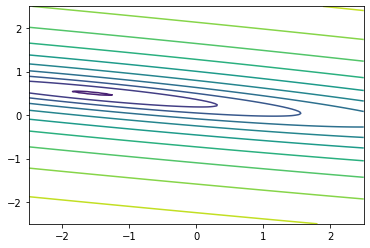

In [7]:
n_contour = 200

bb0 = np.linspace(-2.5, 2.5, n_contour)
bb1 = np.linspace(-2.5, 2.5, n_contour)
b0, b1 = np.meshgrid(bb0, bb1)
loss_contour = loss_function(b0,b1)

plt.contour(b0, b1, np.log(loss_contour), 10);

# Penalize both parameters

[-1.54967692  0.50343837]
[-1.49153282  0.49470609]
[-1.08145021  0.43291629]
[-0.26610476  0.30471888]
[-0.00581715  0.21341069]
[0.00663257 0.07029636]
[0.00098232 0.0091766 ]
[0.00010254 0.00094663]


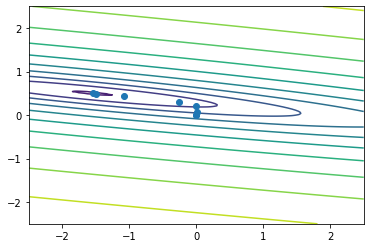

In [8]:
gamma = np.array([0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000])
g = gamma.shape[0]
X = np.vstack((np.ones(N),x.T)).T
Xy = X.T @ y
beta_hat = np.zeros((g,2))
for i in range(g):
  betahat = inv(X.T @ X +N*gamma[i]*np.identity(2)) @ Xy
  beta_hat[i][0] = betahat[0]
  beta_hat[i][1] = betahat[1]
  print(beta_hat[i])

plt.contour(b0, b1, np.log(loss_contour), 10);
plt.plot(beta_hat.T[0], beta_hat.T[1], 'o')
plt.show()

## Penalize beta1 only

[[-1.55610172]]
[[0.50438908]]
[[-1.5533198]]
[[0.50384657]]
[[-1.52582624]]
[[0.49848502]]
[[-1.27997756]]
[[0.45054184]]
[[-0.14731365]]
[[0.22965997]]
[[0.83084463]]
[[0.03890838]]
[[1.00892338]]
[[0.00418108]]
[[1.02820346]]
[[0.00042125]]


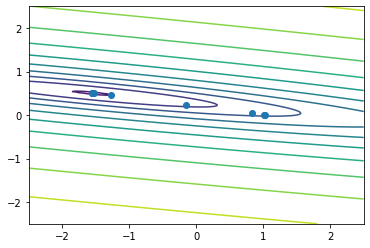

In [9]:
One = np.ones((N,1))
for i in range(g):
  alpha = inv(x@x.T - One@One.T@x@x.T/N + N*gamma[i]*np.identity(N)) @ (np.identity(N)-One@One.T/N) @ y
  beta1 = x.T @ alpha
  beta0 = One.T@(y - x@beta1)/N
  print(beta0)
  print(beta1)
  beta_hat[i][0] = beta0
  beta_hat[i][1] = beta1

plt.contour(b0, b1, np.log(loss_contour), 10);
plt.plot(beta_hat.T[0], beta_hat.T[1], 'o')
plt.show()